In [1]:
import os
import skimage as ski
from matplotlib import pyplot as plt
from matplotlib.axes import Axes as plt_Axes
import numpy as np
from typing import Any, cast
import easyocr

def grayToRgb(img_g: np.ndarray, alpha_source: np.ndarray | None = None) -> np.ndarray:
	if alpha_source is not None:
		return np.stack([img_g, img_g, img_g, alpha_source[:, :, -1]], axis=2)
	else:
		return np.stack([img_g, img_g, img_g], axis=2)

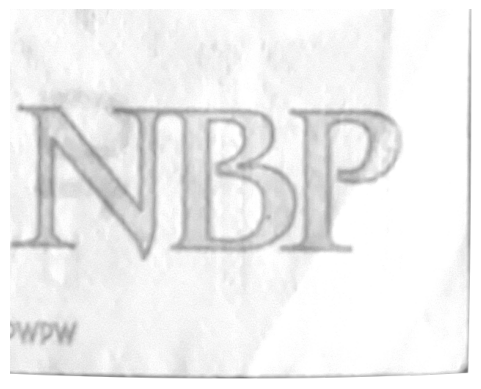

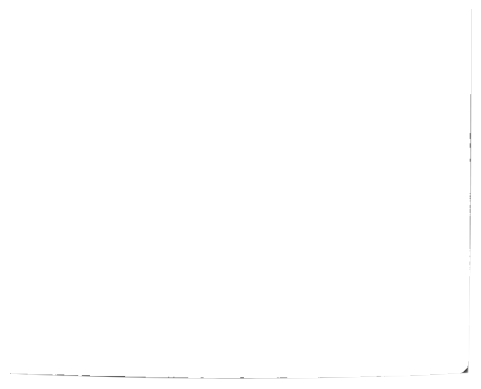

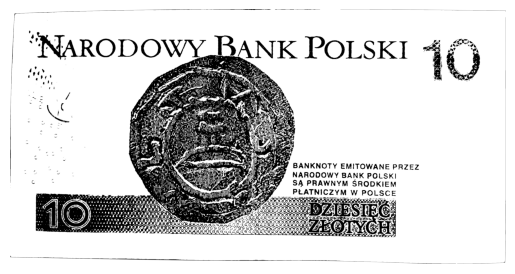

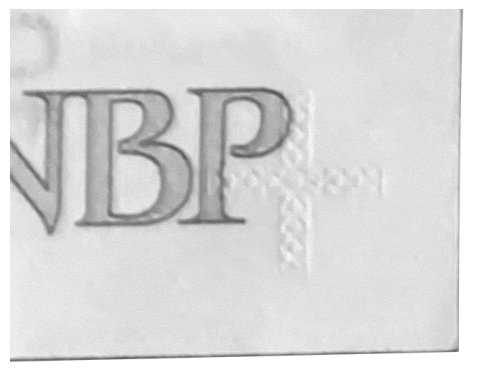

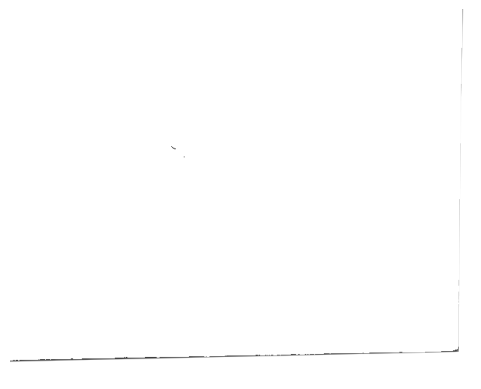

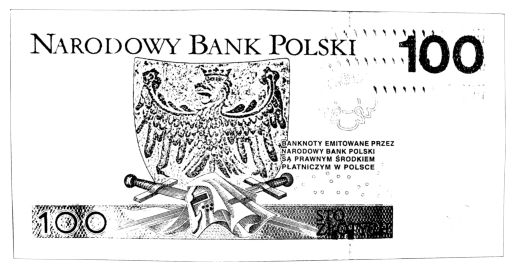

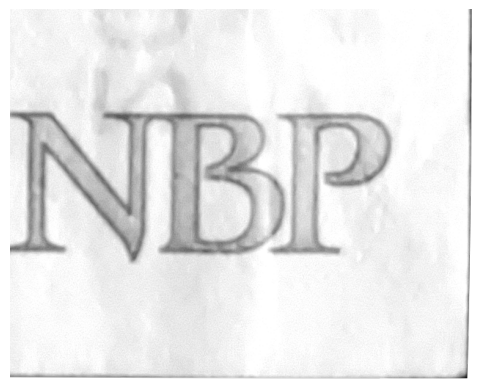

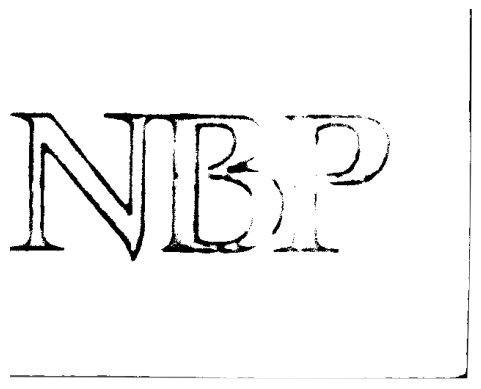

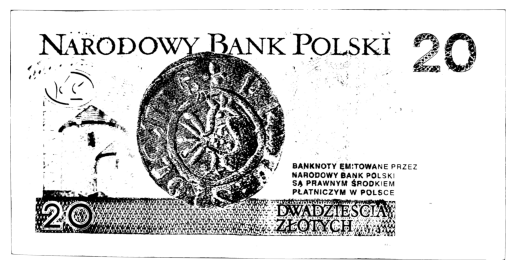

([[0, 127], [514, 127], [514, 356], [0, 356]], 'NEZ', 0.43952405094030733)


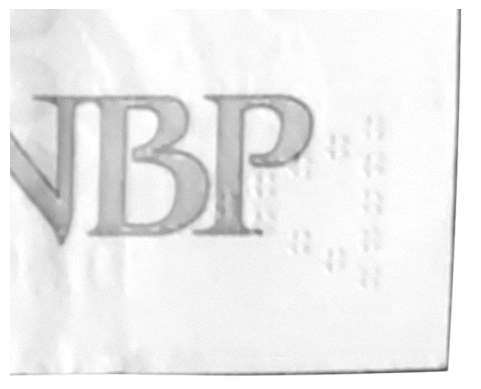

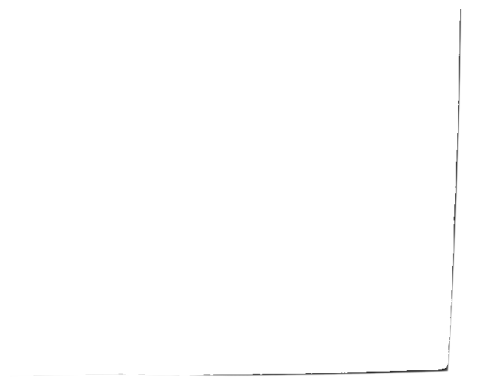

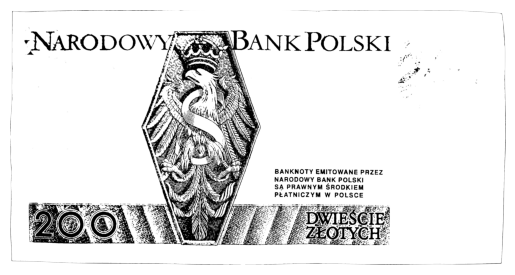

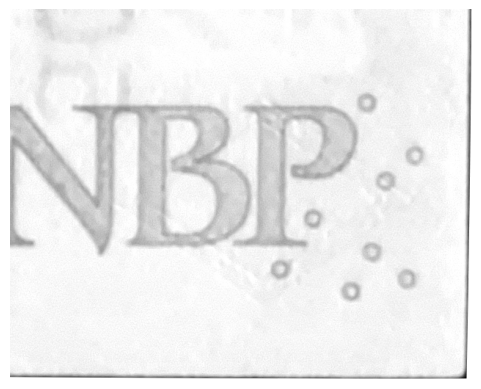

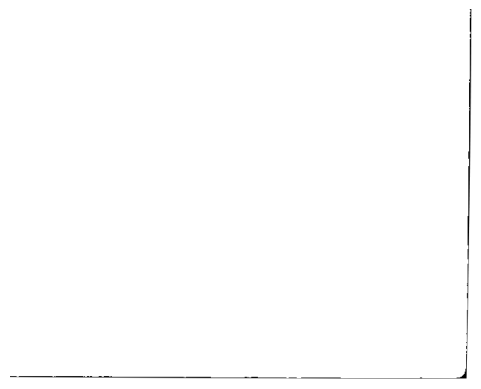

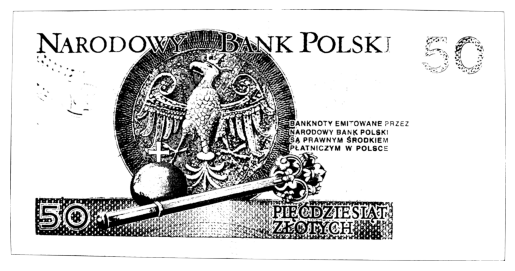

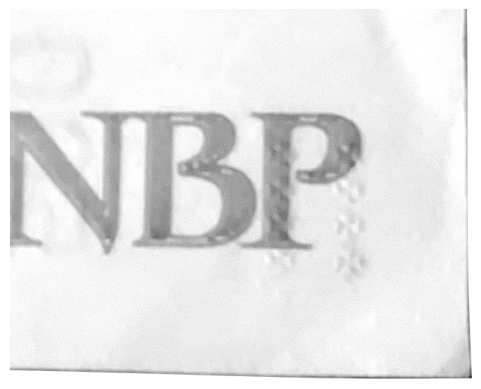

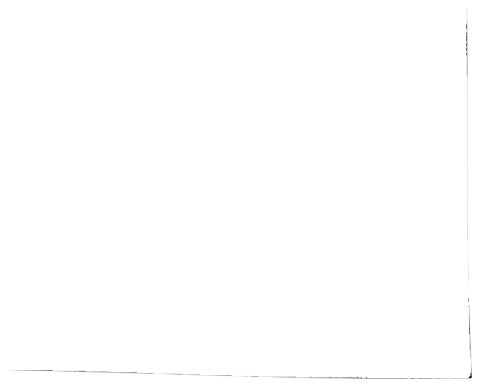

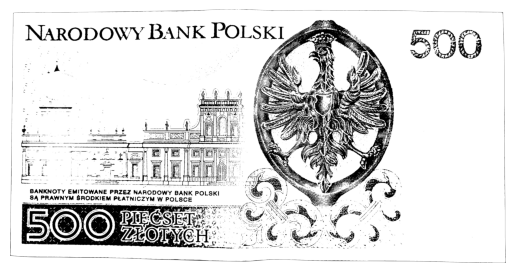

In [9]:
files_back = list(filter(lambda f: f.endswith("back.png"), os.listdir(".")))
files_back

reader = easyocr.Reader(["en"], gpu= True)

for i in range(len(files_back)):
	img = ski.io.imread(files_back[i])
	# ax[i].imshow(img)
	# ax[i].axis(False)
	img = np.rot90(img, 3)
	# plt.imshow(img)
	# plt.axis(False)
	# plt.show()

	img_c = ski.color.rgb2gray(img[:, :, :3])

	# img_ce = ski.exposure.equalize_hist(img_c)
	pDW, pUP = np.percentile(img_c, (5, 95))
	img_ce = ski.exposure.rescale_intensity(img_c, (pDW, pUP))

	img_c = np.uint8(img_c * 255)
	img_ce = np.uint8(img_ce * 255)
	
	img_ca = grayToRgb(img_c, img)
	img_cea = grayToRgb(img_ce, img)
	# plt.imshow(img_ca)
	# plt.axis(False)
	# plt.show()
	# plt.imshow(img_cea)
	# plt.axis(False)
	# plt.show()
	corner_ur = img_cea[-int(2.0*252):, -int(2.5*252):, :]

	plt.imshow(corner_ur)
	plt.axis(False)
	plt.show()

	thr: int = min(ski.filters.threshold_multiotsu(corner_ur[:, :, 0], 3))
	thr1: int = min(ski.filters.threshold_multiotsu(img_cea[:, :, 0], 3))
	corner_ur_th = corner_ur[:, :, 0] > thr
	corner_ur_th1 = img_cea[:, :, 0]  > thr1
	corner_ur_th = ski.morphology.binary_opening(corner_ur_th, ski.morphology.disk(int(0.2 * 252)))
	corner_ur_th1 = ski.morphology.binary_opening(corner_ur_th1, ski.morphology.disk(int(0.2 * 252)))
	corner_ur_th = np.uint8(corner_ur_th) * 255
	corner_ur_th1 = np.uint8(corner_ur_th1) * 255

	corner_ur_th = np.uint8(corner_ur[:, :, 0] > thr) * 255
	corner_ur_th1 = np.uint8(img_cea[:, :, 0]  > thr1) * 255

	plt.imshow(grayToRgb(corner_ur_th, corner_ur))
	plt.axis(False)
	plt.show()
	plt.imshow(grayToRgb(corner_ur_th1, img_cea))
	plt.axis(False)
	plt.show()
	list(map(print, reader.readtext(corner_ur_th)))
